# Random Forest
- Random Forest는 앙상블 학습(Ensemble Learning)의 일종이다.
##### Ensemble Learning이란?
- 다양한 알고리즘을 합치거나, 하나의 알고리즘을 여러번 돌림으로써 효과를 높이는 학습방법

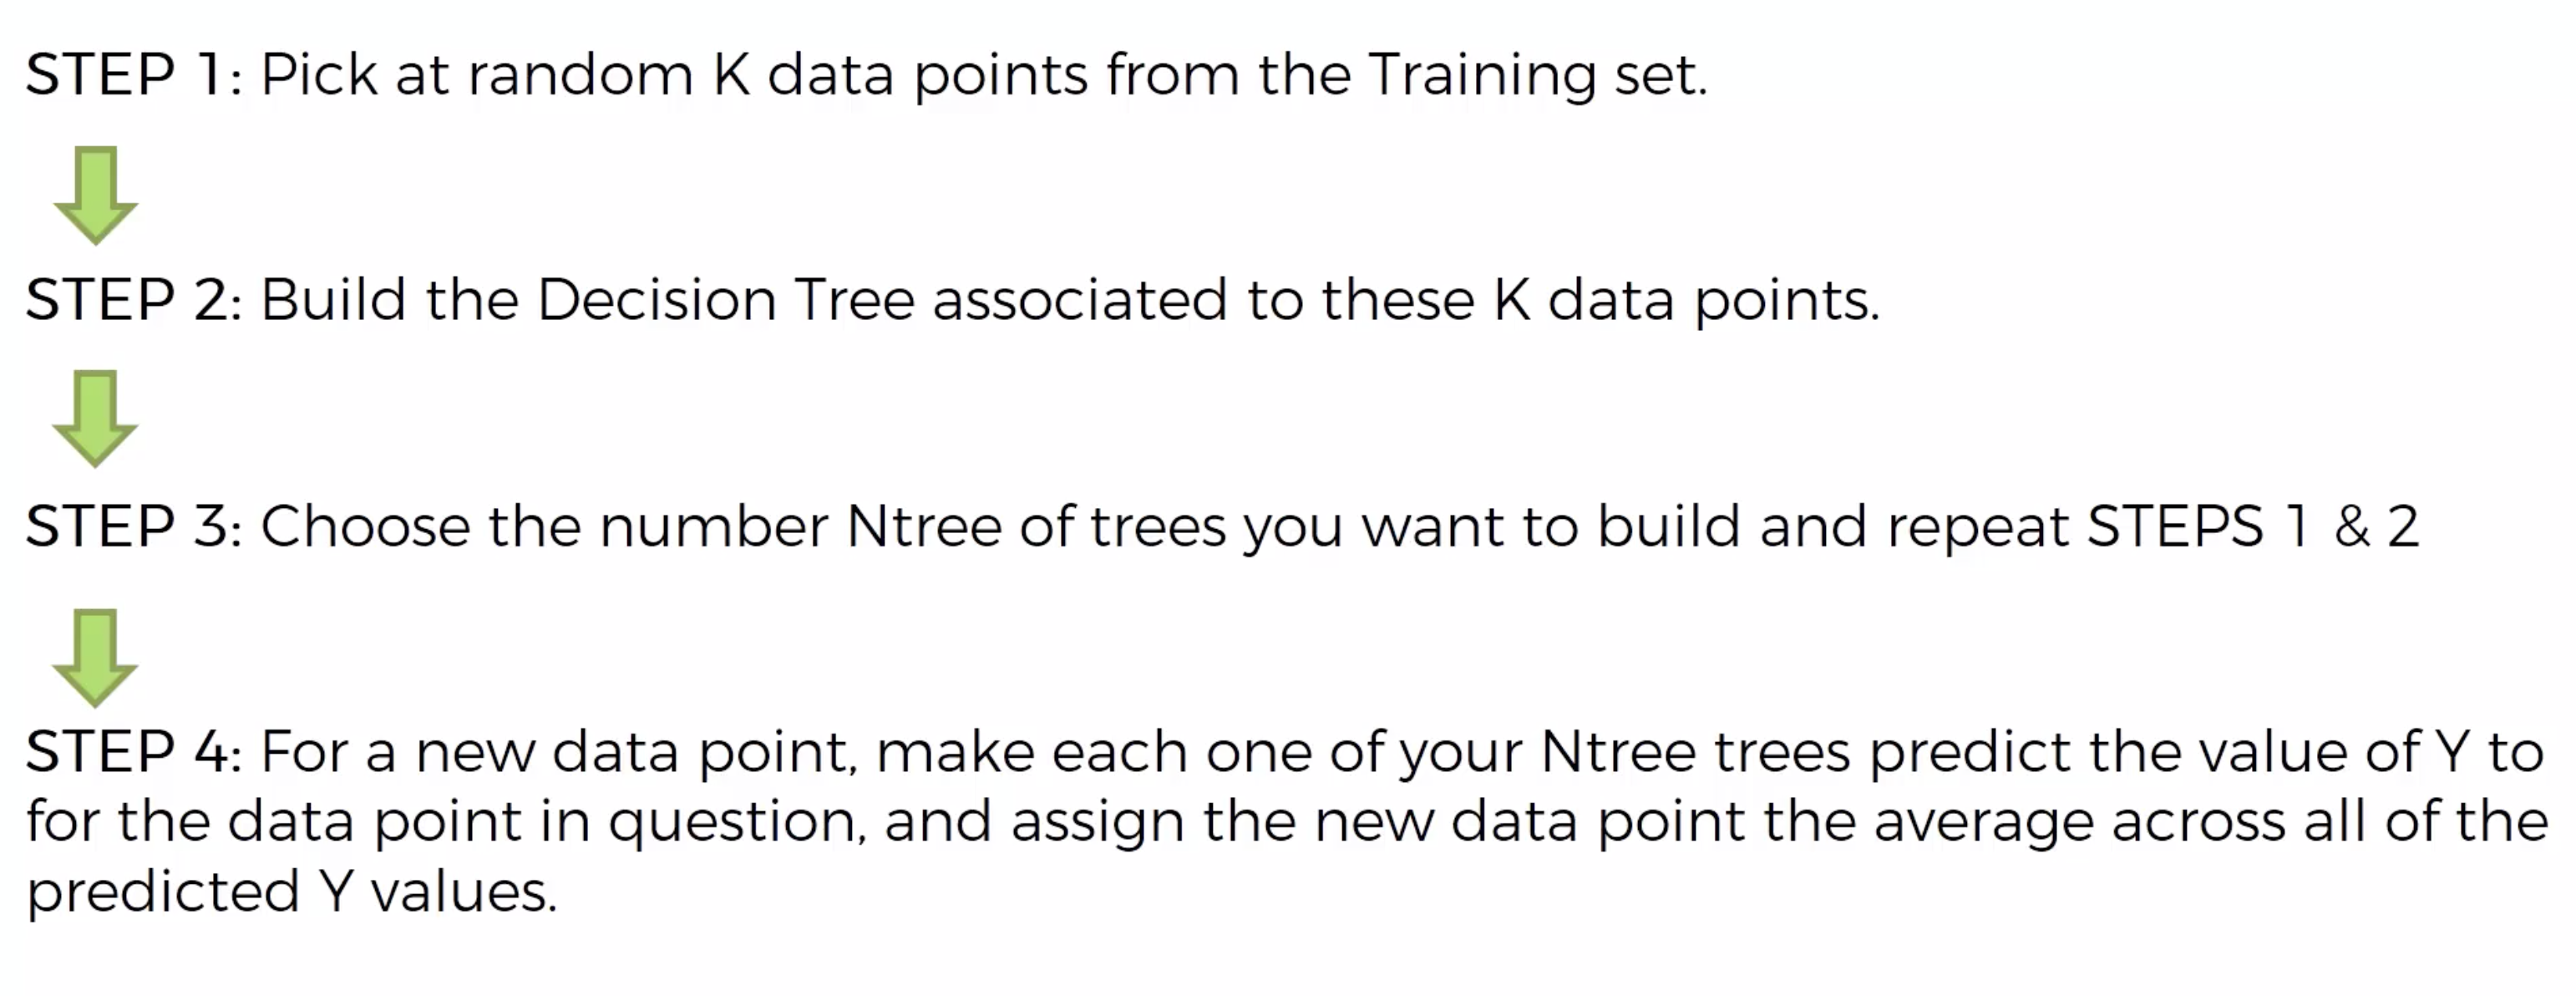

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv("Machine Learning A-Z Template Folder/Part 2 - Regression/Section 8 - Decision Tree Regression/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [2]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [3]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0) #by default 10 trees
regressor.fit(X,y)

/Users/danielhan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Text(0, 0.5, 'Salary')

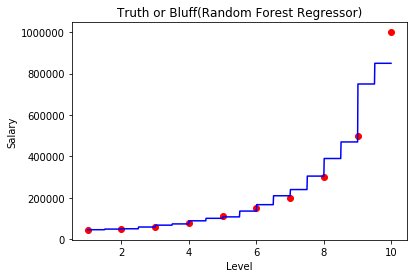

In [4]:
X_grid = np.arange(min(X),max(X),0.01)
X_grid = np.expand_dims(X_grid,axis=1)
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.title('Truth or Bluff(Random Forest Regressor)')
plt.xlabel('Level')
plt.ylabel('Salary')

#### 자세히 보면 Decision Tree모델에 비해 더 많은 interval로 쪼개진 걸 볼수가 있다.
- 여러 Decision Tree 모델들의 prediction을 결합하여(10가지) 평균을 내어 Random Forest모델의 prediction으로 산출하기 때문. (앙상블러닝)
- 그럼 Decision Tree 개체수를 증가시키면 interval도 더 많이 쪼개질까요?

Text(0, 0.5, 'Salary')

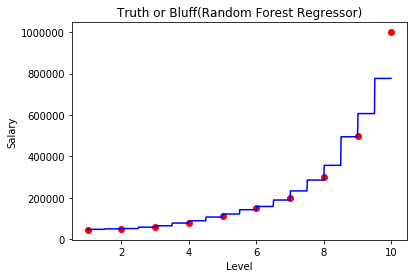

In [5]:
#나무 100그루
regressor2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor2.fit(X,y)
X_grid = np.arange(min(X),max(X),0.01)
X_grid = np.expand_dims(X_grid,axis=1)
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor2.predict(X_grid),color='blue')
plt.title('Truth or Bluff(Random Forest Regressor)')
plt.xlabel('Level')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

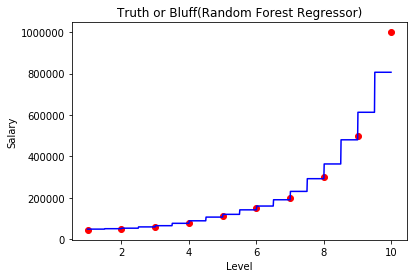

In [6]:
# 나무 300그루
regressor3 = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor3.fit(X,y)
X_grid = np.arange(min(X),max(X),0.01)
X_grid = np.expand_dims(X_grid,axis=1)
plt.scatter(X,y,color='red')
plt.plot(X_grid,regressor3.predict(X_grid),color='blue')
plt.title('Truth or Bluff(Random Forest Regressor)')
plt.xlabel('Level')
plt.ylabel('Salary')

In [7]:
# 목표 6.5level에 해당하는 Salary = 16만정도
print(regressor.predict([[6.5]]))
print(regressor2.predict([[6.5]]))
print(regressor3.predict([[6.5]]))

[167000.]
[158300.]
[160333.33333333]


- 이처럼 랜덤포레스트에서는 나무의 그루수가 많다고 해서 interval이 더 잘게 쪼개지는게 아니라, 더 정확한 지점의 인터벌들로 산출되어 지는 Decision Tree알고리즘들의 평균을 구할수 있다는게 포인트다.